# Information Retrieval - Assigment 6
Group 3: Hooshyar Hosna, Lima Rachel, Lorefice Alessandra

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Import-the-Tweets" data-toc-modified-id="Import-the-Tweets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the Tweets</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Emojis" data-toc-modified-id="Emojis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Emojis</a></span></li><li><span><a href="#Function" data-toc-modified-id="Function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Function</a></span></li><li><span><a href="#Functions-for-Preprocessing" data-toc-modified-id="Functions-for-Preprocessing-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Functions for Preprocessing</a></span></li><li><span><a href="#Create-Vocabulary" data-toc-modified-id="Create-Vocabulary-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Create Vocabulary</a></span></li></ul></li><li><span><a href="#Task-1" data-toc-modified-id="Task-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task 2</a></span><ul class="toc-item"><li><span><a href="#Performance-using-SentiStrength-Original-Dictionary" data-toc-modified-id="Performance-using-SentiStrength-Original-Dictionary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Performance using SentiStrength Original Dictionary</a></span><ul class="toc-item"><li><span><a href="#Single-tweets" data-toc-modified-id="Single-tweets-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Single tweets</a></span></li><li><span><a href="#Overall-tweets" data-toc-modified-id="Overall-tweets-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Overall tweets</a></span></li></ul></li><li><span><a href="#Performance-using-Our-Dictionary" data-toc-modified-id="Performance-using-Our-Dictionary-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performance using Our Dictionary</a></span><ul class="toc-item"><li><span><a href="#Single-tweets" data-toc-modified-id="Single-tweets-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Single tweets</a></span></li><li><span><a href="#Overall-tweets" data-toc-modified-id="Overall-tweets-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Overall tweets</a></span></li></ul></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li></ul></div>

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.tokenize import word_tokenize, TweetTokenizer
from wordsegment import load, segment
load()
import nltk
from nltk.stem import WordNetLemmatizer
import gensim as gs
from gensim.corpora import Dictionary
import seaborn as sns
import numpy as np
import random
from copy import deepcopy
import pprint
# Libraries for SentiStrength 
import subprocess
import shlex
import os.path
import sys
import itertools
import io
import csv
from num2words import num2words
import operator
import collections
import demoji
demoji.download_codes()
 
#warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\USUARIO\miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


... OK (Got response in 0.55 seconds)
Writing emoji data to C:\Users\USUARIO\.demoji\codes.json ...
... OK


## Import the Tweets

In [2]:
#read textual documents from file
documents_path = 'data\Lab_Corpus.txt'
with open(documents_path, 'r', encoding='utf-8') as doc_f:
    corpus_list = doc_f.readlines()

In [3]:
corpus_list

['"","x"\n',
 '"1","No-code data science is easier than you think.  Learn how to start building models in minutes at our 3-day conference — completely free."\n',
 '"2","@Mikeyanlam @ARKInvest @richard_chu97 @Soumyazen @TerraPharma1 Teladoc before livongo acquisition is just zoom doctor. That business have a lot competition, everybody think they can do it, Amazon, Walmart etc. However, Livongo changes the picture since there’s data science part not so easy to replicate. It’s dead money until livongo pick up."\n',
 '"3","@niajmattu @RachelBitecofer @Davidj2040 @EvanMcMullin Because beyond that they don’t agree on anything. People think the aversion to data science and fact is a far right thing. It’s just a general right thing."\n',
 '"4","@blairnilsson BLAIR!! thank you. I will check the dates and see what i can spin up. I\'m more data science than data sec *right* now but I also think I\'d love to see what the community is up to!"\n',
 '"5","@RoshenSethna @Jan_Ainali @ryanko @NavaPBC @M

We decided to build a dataframe with the tweets in order to have them together with hashtags and mentions.

In [4]:
tweet_df = pd.read_csv(documents_path, names=['index', 'original_tweet'])
tweet_df = tweet_df.drop(columns=['index'], axis=1)
tweet_df = tweet_df.iloc[1:,]
tweet_df.head(10)

,original_tweet
1,No-code data science is easier than you think....
2,@Mikeyanlam @ARKInvest @richard_chu97 @Soumyaz...
3,@niajmattu @RachelBitecofer @Davidj2040 @EvanM...
4,@blairnilsson BLAIR!! thank you. I will check ...
5,@RoshenSethna @Jan_Ainali @ryanko @NavaPBC @Ma...
6,@MehNitesh2 @JoTrader4 @WholeMarsBlog Data wil...
7,"Feel free to comment, we did love to hear your..."
8,"Feel free to comment, we did love to hear your..."
9,No-code data science is easier than you think....
10,"Probably unpopular opinion, but I think it’s g..."


In [5]:
tweet_df['hashtag'] = tweet_df['original_tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
tweet_df['tag'] = tweet_df['original_tweet'].apply(lambda x: re.findall(r'\B@\w*[a-zA-Z]+\w*', x))
tweet_df.head(10)

,original_tweet,hashtag,tag
1,No-code data science is easier than you think....,[],[]
2,@Mikeyanlam @ARKInvest @richard_chu97 @Soumyaz...,[],"[@Mikeyanlam, @ARKInvest, @richard_chu97, @Sou..."
3,@niajmattu @RachelBitecofer @Davidj2040 @EvanM...,[],"[@niajmattu, @RachelBitecofer, @Davidj2040, @E..."
4,@blairnilsson BLAIR!! thank you. I will check ...,[],[@blairnilsson]
5,@RoshenSethna @Jan_Ainali @ryanko @NavaPBC @Ma...,[],"[@RoshenSethna, @Jan_Ainali, @ryanko, @NavaPBC..."
6,@MehNitesh2 @JoTrader4 @WholeMarsBlog Data wil...,[],"[@MehNitesh2, @JoTrader4, @WholeMarsBlog]"
7,"Feel free to comment, we did love to hear your...","[#DataScience, #AI, #ML, #polltime, #DSDojo]",[]
8,"Feel free to comment, we did love to hear your...","[#DataScience, #AI, #ML, #polltime, #DSDojo]",[]
9,No-code data science is easier than you think....,[],[]
10,"Probably unpopular opinion, but I think it’s g...",[],[]


## Preprocessing

Our steps:

1. Cleaning
2. Tokenize
3. Split words that are together (e.g. *datascience -> data science*)
4. Removing stop words 
5. Omitting terms with length lower than 3

Output:

- Vocabulary

### Cleaning


1. Remove HTTP/HTTPS and URLs
2. Remove mentions
3. Remove hashtag symbols
4. Remove irrelevant emojis and convert relevant ones to text (e.g. 👍 *-> thumbs_up*)	
5. Split words 
6. Remove digits
6. Convert text to lower case

### Emojis

Since the emojis often used to convey emotions, we decided to keep them and convert them to text. They will be added in the dictionary of SentiStrength with the sentiment that we gave them. To do so, we looked at the emojis singularly and we tried to find a sentiment using the dictionary of emojis of SentiStrength, when it was possible. We dediced also to remove some irrelevant emojis such as dialogue boxes, arrows, etc.

In [6]:
all_emojis = dict()

for t in corpus_list:
    if demoji.findall(t):
        for e in demoji.findall(t):
            if e not in all_emojis:
                all_emojis[e] = '_'.join(demoji.findall(t)[e].split())

Since the emojis in SentiStrength are all carachterized with -1, 0 or 1, we decided to keep this and carachterize our emojis in the same way.

In [7]:
all_emojis_df = pd.DataFrame.from_dict(all_emojis, orient='index')
all_emojis_df = all_emojis_df.reset_index()
all_emojis_df = all_emojis_df.rename(columns = {'index':'emoji', 0:'meaning'})
sentiment = [1, '', '', 1, 0, 0, 0, '', 1, '', 0, 0, 1, 1, 1, 1, 
             '', '', 1, 1, 1, 1, 1, 1, '', '', '', -1, 0, '',  0,
             0, '', 1, 0, 0, 1, '', '', '', 1, 1, -1]
    
all_emojis_df['sentiment'] = sentiment
all_emojis_df

,emoji,meaning,sentiment
0,✨,sparkles,1
1,💬,speech_balloon,
2,⬇️,down_arrow,
3,👍,thumbs_up,1
4,🤷‍♂️,man_shrugging,0
5,🤷‍♀️,woman_shrugging,0
6,🤔,thinking_face,0
7,🏀,basketball,
8,☺️,smiling_face,1
9,👇,backhand_index_pointing_down,


In [8]:
original_emojis = dict()

lines = open('SentStrength_Data_Original\EmoticonLookupTable.txt', 
             'r', encoding='latin1').readlines()
for line in lines:
    original_emojis[line.split('\t')[0]] = line.split('\t')[1]  

In [9]:
# now we add this in the dictionary file EmoticonLookupTable provided by SentiStrenght

with open('SentStrength_Data_Bonus\EmoticonLookupTable.txt', 'w', encoding='utf-8') as f:
    for e in list(original_emojis.keys()):
        f.write(str(e)+'\t'+str(original_emojis[e])+'\n')
    for s in range(len(all_emojis_df.iloc[:,2:3])):
        if all_emojis_df.iloc[s, 2] != '':
                f.write(str(all_emojis_df.iloc[s, 1])+'\t'+str(all_emojis_df.iloc[s, 2])+'\n')       

In [10]:
relevant_emojis = all_emojis_df[all_emojis_df['sentiment'] != '']
relevant_emojis = relevant_emojis.set_index('emoji')
relevant_emojis

,meaning,sentiment
emoji,,
✨,sparkles,1
👍,thumbs_up,1
🤷‍♂️,man_shrugging,0
🤷‍♀️,woman_shrugging,0
🤔,thinking_face,0
☺️,smiling_face,1
😉,winking_face,0
😅,grinning_face_with_sweat,0
🕺,man_dancing,1


### Function

In [11]:
def cleaning(tweet):
    
    #to remove links that start with HTTP/HTTPS in the tweet
    tweet = re.sub(r"http\S+", "", tweet) 
    
     #to remove other url links
    tweet = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', ' ', 
               tweet, flags=re.MULTILINE)
    
    #remove mentions
    tweet = re.sub(r"@\S+", "", tweet)
    
    #remove hashtags symbols
    tweet = re.sub(r"#", "", tweet)
    
    # to remove irrelevent emojis and substitute relevant ones with text
    emojis_dict = demoji.findall(tweet)
    for key in list(emojis_dict.keys()):
        if key in list(relevant_emojis.index):
            tweet = ''.join([l if l!=key else ' '+relevant_emojis.loc[key]['meaning'] for l in tweet])
        else:
            tweet = re.sub(str(key), '', tweet)

    # to split words that are together
    tweet = ''.join([a for a in re.split('([A-Z][a-z]+)', tweet) if a])
    
    # to remove digits
    tweet = re.sub(r"\d", "", tweet)

    #to lower the characters in a text
    tweet = tweet.lower()
    
    return tweet

### Functions for Preprocessing

In [12]:
def createTokens(collection):
    
    '''
    given a collection as input, it gives a list of all the tokens of that collection
    and a list lists where each list contains the tokens for that document of the collection
    
    '''
    tknzr = TweetTokenizer()
    
    #create create a list of lists for the tokens of each document
    tokenized_collection = []

    for doc in collection:
        tokenized_collection.append(tknzr.tokenize(doc))        
            
    return tokenized_collection

In [13]:
def splitWords(tokens):
    
    '''
    given a list of tokens it divides words that are together
    
    e.g. datascience -> data science
    
    '''
    
    splitted = []
    
    for term in tokens:
        term = ' '.join(segment(term))
        splitted.append(term) 
        
    tknzr = TweetTokenizer()
    splitted_tokens = [tknzr.tokenize(st) for st in splitted]
    
    tokens = []

    for doc_tokens in splitted_tokens:
        for word in doc_tokens:
            tokens.append(word)
    
    return tokens

In [14]:
def removeStopWords(terms):
    
    '''
    given as input a list of terms and the number of stop words to be removed, 
    it gives a list of terms removing those stop words stop words
    if the number of stop words is bigger than the total number of stop words we have
    it will remove the maximum number of stop words possible
    
    '''

    terms_no_stopwords = []
    stop_words = nltk.corpus.stopwords.words('english')
    
    for term in terms:
        if term not in stop_words:
            terms_no_stopwords.append(term)
            
    return terms_no_stopwords

In [15]:
def omittingShortTerms(terms):
    
    '''
    if the words are short this will be omitted from the text
    '''

    #the stemmer requires a language parameter
    
    terms_kept = []
    
    for term in terms:
        if len(term)>=3:
            terms_kept.append(term)

    return terms_kept

In the function below we put everything together to have a faster way to do preprocessing.

In [16]:
def preprocessing(clean_documents):
    
    '''
    given a document it preprocess it following these steps:
        - tokenize
        - split words
        - remove stop words
        - lemmatize
        - omitting short terms
    
    '''
    
    final = []
    
    #tokenize
    tokens = createTokens(clean_documents)
        
    for t in tokens:
        
        #split words 
        split = splitWords(t)
        
        #remove stop words
        no_sw = removeStopWords(split)

        #omitting terms with lenght = 1
        final.append(omittingShortTerms(no_sw))
    
    return final

### Create Vocabulary

In [17]:
#create term dictionary using gensim.corpora.Dictionary

final_corpus = []

for tweet in list(tweet_df['original_tweet']):
    tweet = cleaning(tweet)
    temp_list_with_sublists = [segment(k) if k.isalpha() else k for k in tweet.split()] 
    temp_list = [[sublist] if type(sublist) == str else sublist for sublist in temp_list_with_sublists]
    temp_string = ' '.join(list(itertools.chain(*temp_list)))
    final_corpus.append(temp_string)
    
preprocess_tokens = preprocessing(final_corpus)
dct = Dictionary(preprocess_tokens)
print('We have '+str(dct.num_docs)+' documents and '+str(len(dct.token2id))+' terms in our collection.')

We have 803 documents and 2351 terms in our collection.


In [18]:
#write our cleaned corpus in a file

with io.open("data_bonus/final_corpus.txt", 'w', encoding="utf-8") as output:
    for tweet in final_corpus:
        output.write(str(tweet) + '\n')

## Task 1

We decided to analyse a random sample for set the sentiment scale. However, since we did some analysis on the resulting tweets, we include the same choices we worked with.

In [19]:
'''

def selectDocuments(from_collection, documents_number):
    
    #given a collection of documents, it selects randomly n=documents_number 
    #of documents from the collection
    
      
    collection = from_collection
    docs = []

    for i in range(documents_number):
        docs.append(random.choice(collection))

    
    return docs   
    
'''

'\n\ndef selectDocuments(from_collection, documents_number):\n    \n    #given a collection of documents, it selects randomly n=documents_number \n    #of documents from the collection\n    \n      \n    collection = from_collection\n    docs = []\n\n    for i in range(documents_number):\n        docs.append(random.choice(collection))\n\n    \n    return docs   \n    \n'

Steps:

- Most common 50 words from all corpus;
- Vote for sign of sentiment;
- Randomly select 20 tweets;
- Assign the numbers based on frequency of the most common 50 words.

In [20]:
# List of all words across tweets
words_in_tweets = list(itertools.chain(*preprocess_tokens))
# Create counter
words_freq = collections.Counter(words_in_tweets)
words_freq.most_common(50) 

[('data', 1238),
 ('science', 802),
 ('think', 353),
 ('learning', 215),
 ('analytics', 215),
 ('big', 172),
 ('believe', 138),
 ('tech', 132),
 ('women', 131),
 ('machine', 125),
 ('help', 109),
 ('find', 102),
 ('masters', 91),
 ('python', 88),
 ('got', 88),
 ('needs', 88),
 ('degree', 83),
 ('stuff', 83),
 ('study', 82),
 ('cant', 81),
 ('code', 79),
 ('days', 76),
 ('news', 76),
 ('accepted', 76),
 ('stream', 76),
 ('australia', 75),
 ('gotta', 75),
 ('sponsors', 75),
 ('fees', 75),
 ('tonight', 75),
 ('celebratory', 75),
 ('business', 72),
 ('stfc', 68),
 ('thought', 65),
 ('lot', 63),
 ('know', 61),
 ('community', 60),
 ('lidar', 60),
 ('deep', 59),
 ('innovation', 59),
 ('robotics', 59),
 ('people', 58),
 ('need', 58),
 ('input', 58),
 ('iot', 58),
 ('javascript', 58),
 ('cybersecurity', 58),
 ('serverless', 57),
 ('opinion', 56),
 ('dev', 56)]

In [21]:
sentiment_of_words = dict()

sentiment_of_words['data'] = 0
sentiment_of_words['science'] = 0
sentiment_of_words['think'] = 0
sentiment_of_words['learning'] = 0
sentiment_of_words['analytics'] = 0
sentiment_of_words['big'] = 0
sentiment_of_words['tech'] = 0
sentiment_of_words['machine'] = 0
sentiment_of_words['thought'] = 0
sentiment_of_words['degree'] = 0
sentiment_of_words['master'] = 0
sentiment_of_words['python'] = 0
sentiment_of_words['stuff'] = 0
sentiment_of_words['study'] = 0
sentiment_of_words['code'] = 0
sentiment_of_words['business'] = 0
sentiment_of_words['lot'] = 0
sentiment_of_words['news'] = 0
sentiment_of_words['stream'] = 0
sentiment_of_words['gotta'] = 0
sentiment_of_words['tonight'] = 0
sentiment_of_words['stfc'] = 0
sentiment_of_words['know'] = 0
sentiment_of_words['lidar'] = 0
sentiment_of_words['deep'] = 0
sentiment_of_words['robotics'] = 0
sentiment_of_words['people'] = 0
sentiment_of_words['input'] = 0
sentiment_of_words['iot'] = 0
sentiment_of_words['javascript'] = 0
sentiment_of_words['cybersecurity'] = 0
sentiment_of_words['serverless'] = 0
sentiment_of_words['days'] = 0     
sentiment_of_words['opinion'] = 0
sentiment_of_words['dev'] = 0 

# changed ones
sentiment_of_words['need'] = 'pos'     
sentiment_of_words['believe'] = 'neg' 
sentiment_of_words['help'] = 'neg'
sentiment_of_words['find'] = 'neg'
sentiment_of_words['got'] = 'neg'
sentiment_of_words['accepted'] = 'neg'
sentiment_of_words['australia'] = 'neg'
sentiment_of_words['celebratory'] = 'neg'
sentiment_of_words['innovation'] = 'neg'
sentiment_of_words['community'] = 'neg'
sentiment_of_words['women'] = 'neg' 
sentiment_of_words['sponsors'] = 'neg' 
sentiment_of_words['fees'] = 'pos' 
sentiment_of_words['like'] = 'neg'
sentiment_of_words['needs'] = 'pos'

In [22]:
def RateSentiment(sentiString, 
                  SentiStrengthLocation="SentiStrengthCom.jar", 
                  SentiStrengthLanguageFolder="SentStrength_Data_Original/"):
    '''
    this function computes the sentiment of a string.
    It takes as input the string, the path for SentiStrengthCom.jar and
    the path for the dictionary with sentiment to be used
    
    '''
    
    #open a subprocess using shlex to get the command line string into 
    #the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + 
                                     SentiStrengthLocation + 
                                     "' stdin sentidata '" + 
                                     SentiStrengthLanguageFolder + 
                                     "'" + 
                                     " scale"),
                         stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    #Can't send string in Python 3, must send bytes
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    stdout_byte, stderr_text = p.communicate(b)
    #convert from byte
    stdout_text = stdout_byte.decode("utf-8")  
    #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1 -5
    stdout_text = stdout_text.rstrip().replace("\t"," ") 
    return stdout_text

In [23]:
# Build the table we are going to use for comparison

comparison_dict = dict()

for w in list(sentiment_of_words.keys()):
    value = RateSentiment(w,"SentiStrengthCom.jar", "SentStrength_Data_Original/")
    final_value = int(value.split()[2])
    comparison_dict[w] = final_value
        
comparison_df = pd.DataFrame.from_dict(comparison_dict, orient='index')
comparison_df = comparison_df.rename(columns={0:'SentiStrength Value'})

We decided to follow this strategy since the frequency is not enough high to use the scale suggested in the slides:
- 0-10% = 0
- 11-20% = 1
- 21-30% = 2
- 31-40% = 3
- 41-100% = 4

In [24]:
#tweet_sample = selectDocuments(final_corpus, 20)
tweet_sample = ["so big big news . i got accepted to study my master ' s degree in data science in australia !!!!!! now i gotta find some sponsors to help me out with fees and all that stuff . tonight we have a celebratory stream ! i can ' t believe it !",
 'data science needs input from women machine learning a i days of code dev community iot flutter python javascript serverless deep learning cybersecurity data science business innovation tech startup robotics data data analytics women in tech',
 'i could give a whole course in the data generating process . i think that ’ s one of the most frequent words i use when teaching public health data analytics classes .',
 'the pandemic exposed the need to think about tomorrow ’ s supply chains . how do we create resiliency and agility in the digital age ? i love this explanation from cto , who says the answer lies with data science and digital twins',
 "i ' m mentoring a college student who ' s an econ major uncertain about her career direction . i think she needs to talk to folks w / eco degrees who have non - wall - street ish jobs . data science / analysis , behavioural research stuff , etc . anyone wanna volunteer or make a connection ?",
 'using data analytics to reduce your carbon footprint | supply chain brain a i ml dl',
 "truth b told : stfc / sng or had ' hide equivalent ' data analytics capability lot earlier when we ' ve data sharing frm moh . we did targetted comm screening with it . stfc urges govt to think ° of its cost - benefit analysis esp mitigation measures needed !",
 "so big big news . i got accepted to study my master ' s degree in data science in australia !!!!!! now i gotta find some sponsors to help me out with fees and all that stuff . tonight we have a celebratory stream ! i can ' t believe it !",
 'to lidar or not to lidar - thoughts ? lidar vs . camera — which is the best for self - driving cars ? link : technology data science machine learning ml artificial intelligence a i d autonomous tesla way mo self driving cars lidar',
 'research live : what are some of the principles underpinning market research ’ s most successful data science innovations ? mrx',
 'probably unpopular opinion , but i think it ’ s great . basic stats and data science is probably more broadly relevant than calculus these days . plus it sounds refreshing , and if done well , it will make school much more fun and help with data literacy :)',
 "so big big news . i got accepted to study my master ' s degree in data science in australia !!!!!! now i gotta find some sponsors to help me out with fees and all that stuff . tonight we have a celebratory stream ! i can ' t believe it !",
 "truth b told : stfc / sng or had ' hide equivalent ' data analytics capability lot earlier when we ' ve data sharing frm moh . we did targetted comm screening with it . stfc urges govt to think ° of its cost - benefit analysis esp mitigation measures needed !",
 "we are in a pandemic . testing is a public health measure not a personal choice . how can you measure success if we dont test ? how do we contain ou breaks if we don ' t test ? no data / science , just feeling good about things ?",
 'india fights corona | opinion | " industry should start working on a i , mm , data science seriously for a atman irb har bharat ." ~',
 "so big big news . i got accepted to study my master ' s degree in data science in australia !!!!!! now i gotta find some sponsors to help me out with fees and all that stuff . tonight we have a celebratory stream ! i can ' t believe it !",
 'from my perspective : science needs public data . science needs open debate about findings . science needs to be open to feedback and change course accordingly .',
 "i am trained in data science but you don ' t need to be to understand a graph . how can you compare september ? no one was vaccinated last september as you well know . if you don ' t think the vaccine works on variants then that is contradicting all scientists who have stated it does .",
 'the troubling thing about data is that , if you \' re black , it \' s likely to contain lies about you . this piece gets at the heart of something that so much alarmed me when i first got into the field , surrounded by people calling these lies " ground truth ".',
 "if you ' re feeling stuck learning a new data science concept , follow advice : write about it ! ( it could help your job prospects , too .)"]

In [25]:
tokens_sample = preprocessing(tweet_sample)

freq_sample = dict()

for w in list(sentiment_of_words.keys()):
    if sentiment_of_words[w] != 0:
        freq_sample[w] = 0
        for t in tokens_sample:
            if w in t:
                freq_sample[w] +=1 
            
perc_freq_sample = dict()

for w in list(freq_sample.keys()):
    perc_freq_sample[w] = int((freq_sample[w]*100)/len(tweet_sample))

sorted(perc_freq_sample.items(), key=operator.itemgetter(1), reverse=True)

[('help', 30),
 ('got', 25),
 ('believe', 20),
 ('find', 20),
 ('accepted', 20),
 ('australia', 20),
 ('celebratory', 20),
 ('sponsors', 20),
 ('fees', 20),
 ('needs', 15),
 ('need', 10),
 ('innovation', 5),
 ('community', 5),
 ('women', 5),
 ('like', 0)]

In [26]:
our_value = []

for w in list(sentiment_of_words.keys()):
    if w in list(perc_freq_sample.keys()):
        if (perc_freq_sample[w] >= 0) and (perc_freq_sample[w] <= 10):
            our_value.append(0)
        elif (perc_freq_sample[w] >= 11) and (perc_freq_sample[w] <= 20):
            our_value.append(1 if sentiment_of_words[w]=='pos' else -1)
        elif (perc_freq_sample[w] >= 21) and (perc_freq_sample[w] <= 30):
            our_value.append(2 if sentiment_of_words[w]=='pos' else -2)
        elif (perc_freq_sample[w] >= 31) and (perc_freq_sample[w] <= 40):
            our_value.append(3 if sentiment_of_words[w]=='pos' else -3)
        elif (perc_freq_sample[w] >= 41) and (perc_freq_sample[w] <= 100):
            our_value.append(4 if sentiment_of_words[w]=='pos' else -4)
    else:
        our_value.append(0)
            
comparison_df['Our Value'] = our_value
comparison_df = comparison_df.reset_index().rename(columns={'index':'word'})

In [27]:
#create our dictionary with sentiment

original_dict = dict()
lines = open('SentStrength_Data_Original\EmotionLookupTable.txt', 
             'r', encoding='latin1').readlines()
for line in lines:
    original_dict[line.split('\t')[0]] = line.split('\t')[1:]  
    
# now we add this in the dictionary file EmotionLookupTable provided by SentiStrenght

with open('SentStrength_Data_Bonus\EmotionLookupTable.txt', 'w', encoding='utf-8') as f:
    for w in list(original_dict.keys()):
        f.write(w+'\t'+'\t'.join(original_dict[w]))
        
    for i in range(len(comparison_df.iloc[:,0:0])):
        f.write(comparison_df.iloc[i,0]+'\t'+str(comparison_df.iloc[i,2])+'\n')       

## Task 2

### Performance using SentiStrength Original Dictionary

In [28]:
SentiStrengthLocation="SentiStrengthCom.jar" 
SentiStrengthLanguageFolder_Original="SentStrength_Data_Original/"

#### Single tweets

In [29]:
FileToClassify = "./data_bonus/final_corpus.txt" #The location of the file that you want classified.
if not os.path.isfile(FileToClassify):
    print("File to classify not found at: ", FileToClassify)

In [30]:
print("Running SentiStrength on file " + FileToClassify + " with command:")
cmd = 'java -jar "' + SentiStrengthLocation + '" sentidata "' + SentiStrengthLanguageFolder_Original + '" input "' + FileToClassify + '"' + " scale"
print(cmd)
p = subprocess.Popen(shlex.split(cmd),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
classifiedSentimentFile = os.path.splitext(FileToClassify)[0] + "0_out.txt"
print("Finished! The results will be in:\n" + 
      classifiedSentimentFile)

Running SentiStrength on file ./data_bonus/final_corpus.txt with command:
java -jar "SentiStrengthCom.jar" sentidata "SentStrength_Data_Original/" input "./data_bonus/final_corpus.txt" scale
Finished! The results will be in:
./data_bonus/final_corpus0_out.txt


In [31]:
senti_str_df = pd.read_csv(r'./data_bonus/final_corpus0_out.txt', delimiter='\t', 
                       encoding='latin1', quoting=csv.QUOTE_NONE, error_bad_lines=False)

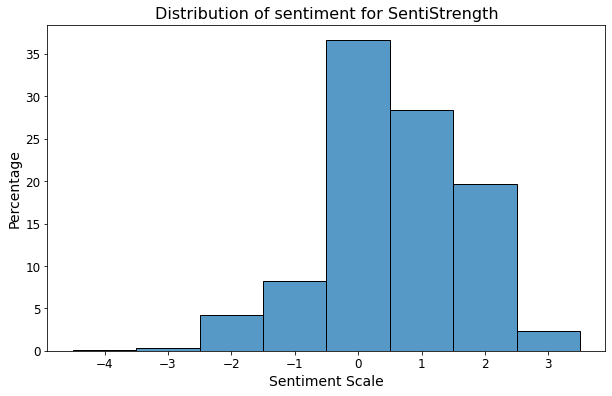

In [32]:
fig = plt.figure(figsize=[10,6])
sns.histplot(senti_str_df, x='Overall', discrete=True,  
             weights=(np.ones(len(senti_str_df))*100 / len(senti_str_df)))
plt.title("Distribution of sentiment for SentiStrength", fontsize=16)
plt.xlabel('Sentiment Scale', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Percentage", fontsize=14)
plt.yticks(fontsize=12);

#### Overall tweets

In [33]:
RateSentiment(' '.join(map(str, final_corpus)), 
              SentiStrengthLocation=SentiStrengthLocation, 
              SentiStrengthLanguageFolder=SentiStrengthLanguageFolder_Original)

'5 -5 0'

Since +5 is less than 1.5(-5), the sentiment of the whole corpus is negative.

### Performance using Our Dictionary

In [34]:
SentiStrengthLocation="SentiStrengthCom.jar" 
SentiStrengthLanguageFolder_Modified="SentStrength_Data_Bonus/"

#### Single tweets

In [35]:
FileToClassify = "./data_bonus/final_corpus.txt" #The location of the file that you want classified.
if not os.path.isfile(FileToClassify):
    print("File to classify not found at: ", FileToClassify)

In [36]:
print("Running SentiStrength on file " + FileToClassify + " with command:")
cmd = 'java -jar "' + SentiStrengthLocation + '" sentidata "' + SentiStrengthLanguageFolder_Modified + '" input "' + FileToClassify + '"' + " scale"
print(cmd)
p = subprocess.Popen(shlex.split(cmd),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
classifiedSentimentFile = os.path.splitext(FileToClassify)[0] + "1_out.txt"
print("Finished! The results will be in:\n" + 
      classifiedSentimentFile)

Running SentiStrength on file ./data_bonus/final_corpus.txt with command:
java -jar "SentiStrengthCom.jar" sentidata "SentStrength_Data_Bonus/" input "./data_bonus/final_corpus.txt" scale
Finished! The results will be in:
./data_bonus/final_corpus1_out.txt


In [37]:
our_df = pd.read_csv(r'./data_bonus/final_corpus1_out.txt', delimiter='\t', 
                       encoding='latin1', quoting=csv.QUOTE_NONE, error_bad_lines=False)

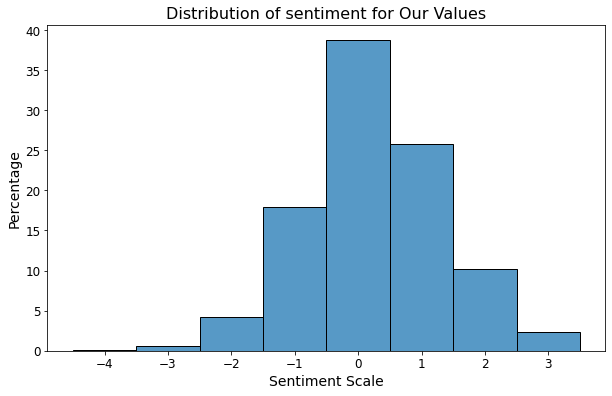

In [38]:
fig = plt.figure(figsize=[10,6])
sns.histplot(our_df, x='Overall', discrete=True,  
             weights=(np.ones(len(our_df))*100 / len(our_df)))
plt.title("Distribution of sentiment for Our Values", fontsize=16)
plt.xlabel('Sentiment Scale', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Percentage", fontsize=14)
plt.yticks(fontsize=12);

#### Overall tweets

In [39]:
RateSentiment(' '.join(map(str, final_corpus)), 
              SentiStrengthLocation=SentiStrengthLocation, 
              SentiStrengthLanguageFolder=SentiStrengthLanguageFolder_Modified)

'5 -5 0'

Since +5 is less than 1.5(-5), the sentiment of the whole corpus is negative.

### Comparison

While we can clearly see that the sentiment for the overall tweets is the same, we can see that some sentiment for the single tweets change. Let us analyse some of them.

In [40]:
comparison_df

,word,SentiStrength Value,Our Value
0,data,0,0
1,science,0,0
2,think,0,0
3,learning,0,0
4,analytics,0,0
5,big,0,0
6,tech,0,0
7,machine,0,0
8,thought,0,0
9,degree,0,0


In [41]:
final_df = deepcopy(our_df)
final_df['SentStr'] = senti_str_df['Overall']
diff = final_df[final_df['SentStr'] != final_df['Overall']]
diff = diff.rename(columns={'Overall':'Our Sentiment', 'SentStr':'SentStr Sentiment'})
diff = diff[['Text', 'Our Sentiment', 'SentStr Sentiment']]

In [42]:
len(diff)

125

While before we had just 60 diffent sentiment values, now they are 125.

In [43]:
# build dataframe for plotting

temp = [-4, -4, -3, -3, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
sentiment = ['SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our',
            'SentiStrength', 'Our']
perc = []

temp_1 = dict(final_df['SentStr'].value_counts())
temp_2 = dict(final_df['Overall'].value_counts())

for i in range(-4,5):
    if i in list(temp_1.keys()):
        perc.append((temp_1[i]*100)/803)
    else:
        perc.append(0)
        
    if i in list(temp_2.keys()):
        perc.append((temp_2[i]*100)/803)
    else:
        perc.append(0)
        

df = pd.DataFrame()
df['temp'] = temp
df['sentiment'] = sentiment
df['perc'] = perc

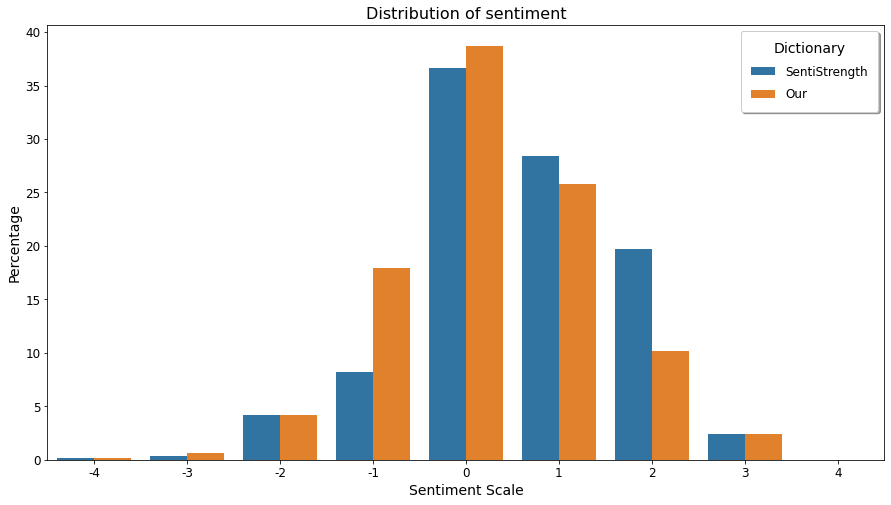

In [44]:
fig = plt.figure(figsize=[15,8])
sns.barplot(x='temp', y='perc', hue='sentiment', alpha=1, data=df)

plt.title("Distribution of sentiment", fontsize=16)
plt.xlabel('Sentiment Scale', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Percentage", fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title="Dictionary", title_fontsize=14, fontsize=12, 
           labelspacing= 0.8, borderpad=0.9, shadow=True, loc='best')

As we can see from the graphic above, the negativity using our sentiment values increases as expected since we turned almost each term into negative.